<a href="https://colab.research.google.com/github/PineappleBingo/CSC448-AI/blob/main/CSC448_Seo_Jinho_AS03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
# Imports section
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Part 1. Loading the dataset

In [173]:
# Using pandas load the dataset (load remotely, not locally)
CSV_URL = "https://raw.githubusercontent.com/profmcnich/example_notebook/main/science_data_large.csv"
# s = requests.get(CSV_URL).content
# df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = pd.read_csv(CSV_URL)

# Output the first 15 rows of the data
print(df.head(15))
# Display a summary of the table information (number of datapoints, etc.)
print(df.info())
# Shape
print("\nRow x Columns:", df.shape)
# column names
print("\nColumn Names:", df.columns)


    Temperature °C  Mols KCL     Size nm^3
0              469       647  6.244743e+05
1              403       694  5.779610e+05
2              302       975  6.196847e+05
3              779       916  1.460449e+06
4              901        18  4.325726e+04
5              545       637  7.124634e+05
6              660       519  7.006960e+05
7              143       869  2.718260e+05
8               89       461  8.919803e+04
9              294       776  4.770210e+05
10             991       117  2.441771e+05
11             307       781  5.006455e+05
12             206        70  3.145200e+04
13             437       599  5.390215e+05
14             566        75  9.185271e+04
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature °C  1000 non-null   int64  
 1   Mols KCL        1000 non-null   int64  
 2   Size nm^3       1000 n

## Part 2. Splitting the dataset

In [174]:
# Take the pandas dataset and split it into our features (X) and label (y)

features = ["Temperature °C", "Mols KCL"]
target = "Size nm^3"

X1 = df[features[0]].values.reshape(-1, 1)
X2 = df[features[1]].values.reshape(-1, 1)
X3 = df[features].values.reshape(-1, len(features))

Y = df[target].values

# Use sklearn to split the features and labels into a training/test set. (90% train, 10% test)
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.1, random_state=10)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.1, random_state=10)
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.1, random_state=10)
# Set random_state(a.k.a seed) so that we can reproduce our results

print("{:<15}{}{}{:<15}{}".format("X1_train Shape:", X1_train.shape, "\t", "X1_test Shape:", X1_test.shape))
print("{:<15}{}{}{:<15}{}".format("X2_train Shape:", X2_train.shape, "\t", "X2_test Shape:", X2_test.shape))
print("{:<15}{}{}{:<15}{}".format("X3_train Shape:", X3_train.shape, "\t", "X3_test Shape:", X3_test.shape))
print("{:<15}{}{}{:<15}{}".format("Y_train Shape:", Y_train.shape, "\t", "Y_test Shape:", Y_test.shape))


X1_train Shape:(900, 1)	X1_test Shape: (100, 1)
X2_train Shape:(900, 1)	X2_test Shape: (100, 1)
X3_train Shape:(900, 2)	X3_test Shape: (100, 2)
Y_train Shape: (900,)	Y_test Shape:  (100,)


## Part 3. Perform a Linear Regression

In [175]:
# Use sklearn to train a model on the training set

# Temperature
clf_x1 = LinearRegression()
clf_x1.fit(X1_train, Y_train)

# KCL
clf_x2 = LinearRegression()
clf_x2.fit(X2_train, Y_train)

# # Make predictions using the testing set
# y_pred = clf.predict(X_test)

# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

# Plot outputs
# plt.scatter(X_test, Y_test, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()
# 
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# -----------------------------------------------

# Create a sample datapoint and predict the output of that sample with the trained model
sample = [[500], [600], [700], [800]]

preds_y1 = clf_x1.predict(sample)
for idx, pred in enumerate(preds_y1):
    print(str(sample[idx]) + " -> Preds_Y1:", pred)

print("---------------------------------------")

preds_y2 = clf_x2.predict(sample)
for idx, pred in enumerate(preds_y1):
    print(str(sample[idx]) + " -> Preds_Y2:", pred)

# Report on the score for that model, in your own words (markdown, not code) explain what the score means
print("---------------------------------------")
print("X1| Score:", clf_x1.score(X1_test, Y_test))
print("---------------------------------------")
print("X2| Score:", clf_x2.score(X2_test, Y_test))

# Explanation
# Using linearRegression algorithm, we traind the data set X and Y, predicting new Ys depends on sample datapoints.
# Based on the scores, we can tell how accurately the chosen algorithm woulde predict outputs by given trained dataset
# ; the hight score means higher accuratcy in predecting outouts. In our case, score is 88% which means linearRegression 
# algorithm has 88% accuracy to predict expanding size of the slime by temperature and amounts of KCL after one day.
   
# Extract the coefficents and intercept from the model and write an equation for your h(x) using LaTeX
print("---------------------------------------")
print("x1 | Coefficients: \n", clf_x1.coef_)
print("x1 | Intercept:", clf_x1.intercept_ )

print("---------------------------------------")

print("x2 | Coefficients: \n", clf_x2.coef_)
print("x2 | Intercept:", clf_x2.intercept_ )


[500] -> Preds_Y1: 506604.5707911067
[600] -> Preds_Y1: 605620.8964563312
[700] -> Preds_Y1: 704637.222121556
[800] -> Preds_Y1: 803653.5477867809
---------------------------------------
[500] -> Preds_Y2: 506604.5707911067
[600] -> Preds_Y2: 605620.8964563312
[700] -> Preds_Y2: 704637.222121556
[800] -> Preds_Y2: 803653.5477867809
---------------------------------------
X1| Score: 0.5216101556308503
---------------------------------------
X2| Score: 0.6141402305954329
---------------------------------------
x1 | Coefficients: 
 [990.16325665]
x1 | Intercept: 11522.942464983149
---------------------------------------
x2 | Coefficients: 
 [1128.56378403]
x2 | Intercept: -24581.02433657489


In [176]:
# y      : response variable
# n      : number of features
# x_n    : n-th feature
# beta_n: regression coefficient(weight) of the n-th feature
# beta  : y-intercept

# y = beta + beta_1(x_1) + beta_2(x_2) + .... + beta_n(x_n) 

In [177]:
# H_temp(x) respects to Temperature
# H_kcl(x) respects to KCL

\begin{gather*}
H_{temp}(x) = 990.16x + 11522.94
\end{gather*}

\begin{gather*}
H_{KCL}(x) = 1128.56x - 24581.02
\end{gather*}

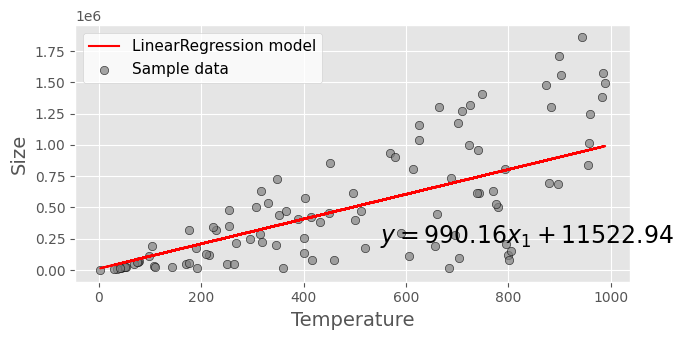

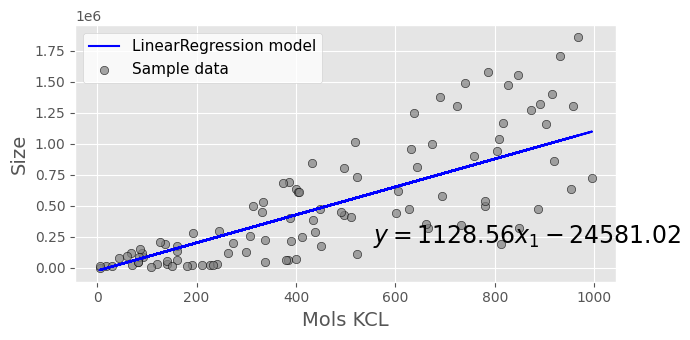

In [178]:
# Plot outputs
preds_y1 = clf_x1.predict(X1_test)
fig1, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(X1_test, preds_y1, color='red', label='LinearRegression model')
ax.scatter(X1_test, Y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Size', fontsize=14)
ax.set_xlabel('Temperature', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 + %.2f $' % (clf_x1.coef_[0], abs(clf_x1.intercept_)), fontsize=17, transform=ax.transAxes)

fig1.tight_layout()


preds_y2 = clf_x2.predict(X2_test)
fig2, bx = plt.subplots(figsize=(7, 3.5))

bx.plot(X2_test, preds_y2, color='blue', label='LinearRegression model')
bx.scatter(X2_test, Y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
bx.set_ylabel('Size', fontsize=14)
bx.set_xlabel('Mols KCL', fontsize=14)
bx.legend(facecolor='white', fontsize=11)
bx.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (clf_x2.coef_[0], abs(clf_x2.intercept_)), fontsize=17, transform=bx.transAxes)

fig2.tight_layout()

Sample equation: $E = mc^2$

## Part 4. Use Cross Validation

In [179]:
# Use the cross_val_score function to repeat your experiment across many shuffles of the data

clf_x1s = svm.SVC(kernel='linear', C=1).fit(X1_train, Y_train)

clf_x1s.score(X1_test, Y_test)

# https://www.geeksforgeeks.org/cross-validation-machine-learning/


clf_x2s = svm.SVC(kernel='linear', C=1).fit(X2_train, Y_train)

clf_x2s.score(X2_test, Y_test)




# Report on their finding and their significance


ValueError: Unknown label type: 'continuous'

## Part 5. Using Polynomial Regression

In [ ]:
# Using the PolynomialFeatures library perform another regression on an augmented dataset of degree 2

clf_x3 = LinearRegression()
clf_x3.fit(X1_train, Y_train)

sample = [[500, 500], [600, 600], [700, 700], [800, 800]]
preds_y = clf.predict(sample)

for idx, pred in enumerate(preds_y):
    print(str(sample[idx]) + " -> Preds_Y:", pred)


# Report on the score for that model, in your own words (markdown, not code) explain what the score means
print("\nScore:", clf.score(X_test, Y_test))

# Explanation
# Using linearRegression algorithm, we traind the data set X and Y, predicting new Ys depends on sample datapoints.
# Based on the scores, we can tell how accurately the chosen algorithm woulde predict outputs by given trained dataset
# ; the hight score means higher accuratcy in predecting outouts. In our case, score is 88% which means linearRegression 
# algorithm has 88% accuracy to predict expanding size of the slime by temperature and amounts of KCL after one day.
   
# Extract the coefficents and intercept from the model and write an equation for your h(x) using LaTeX
print("\nCoefficients: \n", clf.coef_)
print("Intercept:", clf.intercept_ )

# Report on the metrics and output the resultant equation as you did in Part 3.

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.